In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Create a hypothetical sales dataset
np.random.seed(42)
dates = pd.date_range('2022-01-01', periods=100)
revenue = np.random.randint(1000, 5000, size=100)
quantity = np.random.randint(50, 200, size=100)
cost = np.random.randint(500, 2000, size=100)

df = pd.DataFrame({'date': dates, 'revenue': revenue, 'quantity': quantity, 'cost': cost})
df.head()

,date,revenue,quantity,cost
0,2022-01-01,4174,195,1451
1,2022-01-02,4507,93,1604
2,2022-01-03,1860,63,1198
3,2022-01-04,2294,144,612
4,2022-01-05,2130,97,501


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      100 non-null    datetime64[ns]
 1   revenue   100 non-null    int64         
 2   quantity  100 non-null    int64         
 3   cost      100 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.3 KB


In [5]:
df.describe()

,date,revenue,quantity,cost
count,100,100.000000,100.000000,100.000000
mean,2022-02-19 12:00:00,3132.320000,122.530000,1219.840000
min,2022-01-01 00:00:00,1021.000000,50.000000,501.000000
25%,2022-01-25 18:00:00,2207.250000,85.750000,789.500000
50%,2022-02-19 12:00:00,3191.500000,117.500000,1257.000000
75%,2022-03-16 06:00:00,4077.750000,162.000000,1625.250000
max,2022-04-10 00:00:00,4943.000000,195.000000,1996.000000
std,NaN,1118.566966,42.977432,444.193395


In [6]:
# Data preprocessing
# Feature engineering
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday


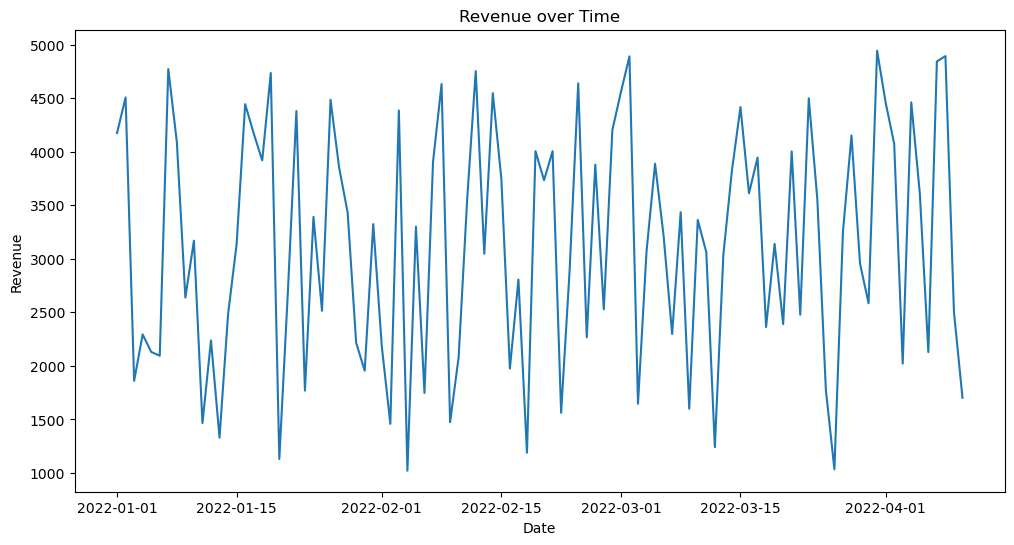

In [7]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='revenue', data=df)
plt.title('Revenue over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

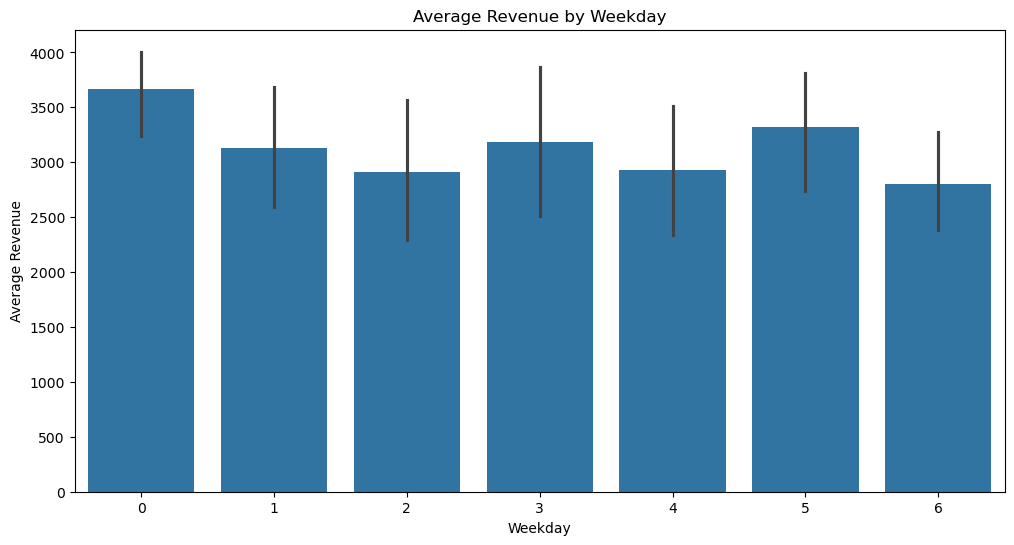

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='revenue', data=df)
plt.title('Average Revenue by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Revenue')
plt.show()

In [9]:
# Predictive modeling
X = df[['month', 'day', 'weekday']]
y = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1501128.005292919
R-squared: -0.03462011361360062


In [13]:
# Feature importance
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

   Feature  Coefficient
0    month   100.335293
1      day     7.914763
2  weekday   -72.187273


##### Business insights
##### Based on the linear regression model, the day of the week has the highest impact on revenue, followed by the month and day of the month.
##### This suggests that the company may consider adjusting its marketing or sales strategies based on the day of the week to maximize revenue.